# Midterm Lab
Theodore Mahlum for Big Data and Analytics on November 20th, 2019 
##### Analyzing Impeachment Investigations in the US Government

## Abstract

##### My Dataset

This lab explores a dataset with information on previous impeachment trials in the US government including the date it occurred, what the result was, who was being tried, the name of the investigation and how long the investigation lasted. The dataset used is called "russia-investigation" and came from Five Thirty Eight.   

The dataset used can be found here: https://github.com/fivethirtyeight/data/blob/master/russia-investigation/russia-investigation.csv

##### My Questions

1. How many features and observations does my dataset have?
2. What is the mean and median investigation length for an impeachment trial?
3. What was the longest investigation and what was its result?
4. What was the shortest investigation and what was its result?
5. What is the most common result of an impeachment investigation?
6. Does there seem to be a correlation between year of the investigation and the result of the investigation (from looking at a graph)?
7. Which president has pardoned the most individuals involved in his impeachment investigation?
8. Which president has pardoned the fewest individuals involved in his impeachment investigation?
9. How many individuals investigated were American? How many were not American?

## Dataset Exploration

In [2]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

After importing the libraries we will use in this lab and setting up seaborn, I want to read into our lab the dataset we are going to use. We use our Pandas library to accomplish this. 

In [4]:
df = pd.read_csv('russia-investigation.csv')

Upon reading in our dataset, we want to look at the first 5 rows of our dataset (in addition to the headers), this helps us get an initial glimpse of what is actually in our dataset. 

In [5]:
df.tail()

,investigation,investigation-start,investigation-end,investigation-days,name,indictment-days,type,cp-date,cp-days,overturned,pardoned,american,president
189,russia,2017-05-17,NaN,659,Russian national 23,422.0,indictment,NaN,NaN,False,False,False,Donald Trump
190,russia,2017-05-17,NaN,659,Russian national 24,422.0,indictment,NaN,NaN,False,False,False,Donald Trump
191,russia,2017-05-17,NaN,659,Russian national 25,422.0,indictment,NaN,NaN,False,False,False,Donald Trump
192,russia,2017-05-17,NaN,659,Michael Cohen,561.0,guilty-plea,2018-11-29,561.0,False,False,True,Donald Trump
193,russia,2017-05-17,NaN,659,Roger Stone,618.0,indictment,NaN,NaN,False,False,True,Donald Trump


Looking at this dataset, we want to separate years from the dates to make it easier for us to analyze the data. 

In [6]:
df['year'] = pd.DatetimeIndex(df['investigation-start']).year

First, Lets look at a count plot of the number of indictments per year. 

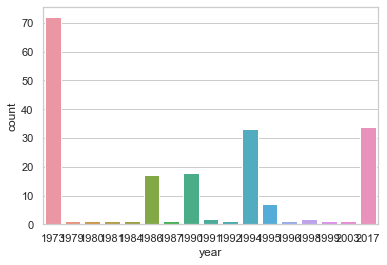

In [59]:
sns.countplot(x="year", data = df)

From the count plot, we can see that the majority of indictments happened in distinct years with few constants. We can also see that the most indictments occurred in the 1970s and in 2017. 

Our next step is to look into what types of data we have, in addition to taking a closer look at what our dataset's features are and how many observations they have. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 14 columns):
investigation          194 non-null object
investigation-start    194 non-null object
investigation-end      160 non-null object
investigation-days     194 non-null int64
name                   181 non-null object
indictment-days        181 non-null float64
type                   181 non-null object
cp-date                126 non-null object
cp-days                123 non-null float64
overturned             194 non-null bool
pardoned               194 non-null bool
american               194 non-null bool
president              194 non-null object
year                   194 non-null int64
dtypes: bool(3), float64(2), int64(2), object(7)
memory usage: 17.4+ KB


Next, I wanted to find out all of the unique types of incidents in an impeachment investivation. 

In [9]:
df["type"].unique()

array(['conviction', 'guilty-plea', 'indictment', nan], dtype=object)

I then wanted to find out all of the unique presidents who have faced impeachment investigations. 

In [10]:
presidents = df["president"].unique()
print(presidents)

['Richard Nixon' 'Jimmy Carter' 'Ronald Reagan' 'George H.W. Bush'
 'Bill Clinton' 'George W. Bush' 'Donald Trump']


In the data-exploration section of this lab, I have found that this dataset has 13 features and 194 observations. This dataset consists of primarily object-type data with some floats, integers, and booleans. Acknowledging our objectivese for this lab, I know I will primarily be interested in the features: "investigation-days", "type", "overturned", "pardoned", "american", "president".  For the purpose of stastical analysis, "investigation-days" is a column of integer data; "type" and "president" are columns of object-type data; "pardoned", "overturned", and "american" are columns of bool type data. Additionally, "type" has three unique values: "conviction", "guilty-plea", and "indictment". There are additionally 7 unique objects for the presidents column, meaning that 7 presidents have faced impeachment trials. Given there are 181 values in the "name" column, we can additionally recognize that 181 people were investigated during the 7 impeachment investigations. What our data-visualization initially shows, without any data-analysis, is that there were potentially multiple investigations during each president's term given there are more datapoints on the visualization than there are candidates.

## Data Modeling and Analysis

##### What is the mean and median investigation length for an impeachment trial?

In [11]:
df.describe()

,investigation-days,indictment-days,cp-days,year
count,194.000000,181.000000,123.000000,194.000000
mean,1733.520619,507.176796,637.439024,1988.979381
std,894.842431,443.585231,509.754299,15.627450
min,171.000000,-316.000000,-136.000000,1973.000000
25%,1101.000000,275.000000,275.000000,1973.000000
50%,1492.000000,422.000000,545.000000,1990.000000
75%,2419.000000,670.000000,990.000000,1994.000000
max,3387.000000,2006.000000,2183.000000,2017.000000


Using the describe function we can see that the mean investigation length was 1733.52 days and the median investigation length was 1492 days. This tells us that the investigation-days data is skewed to the right because the median is less than the mean. We also know the longest investigation was 3387 days long and the shortest lasted only 171 days. 

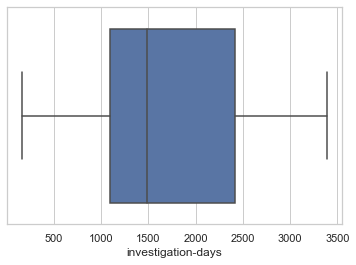

In [12]:
ax = sns.boxplot(x=df["investigation-days"])

#### What was the longest investigation and what was its result?

Knowing the longest investigation was 3387 days long, we first want to find the index of this value.

In [13]:
df["investigation-days"].idxmax(axis=0)

148

We then want to use this index to find out the result of the investigation.

In [14]:
df["type"].at[148]

'guilty-plea'

We now know that the longest investigation resulted in a guilty-plea.

While we know what the result of the investigation is, we now want to find whether the individual in question got their ruling overturned or pardoned, and whether they are American.

In [15]:
df["overturned"].at[148] 

False

In [16]:
df["pardoned"].at[148]

True

We now know that the subject of the longest investigation was pardoned.

In [17]:
df["american"].at[148]

True

The American subject was investigated for 3387 days, the result of which was a guilty-plea. They were later pardoned. 

#### What was the shortest investigation and what was its result?

Knowing the shortest investigation was 171 days long, we first want to find the index of this value.

In [18]:
df["investigation-days"].idxmin(axis=0)

75

We then want to use this index to find out the result of the investigation.

In [19]:
df["type"].at[75]

nan

We now know that the shortest investigation resulted in neither a guilty-plea, an indictment, nor a conviction.
While we know what the result of the investigation is, we now want to find whether the individual in question was American.

In [20]:
df["american"].at[75]

True

Our subject was investigated for only 171 days before their investigation was ended without a result. They are American.

#### What is the most common result of an impeachment investigation?

First we want to see how many times the result is a conviction.

In [21]:
(df["type"]=="conviction").sum()

39

We find that there have been 39 convictions.

We then want to find how many guilty pleas there have been.

In [22]:
(df["type"]=="guilty-plea").sum()

86

We find that there have been 86 guilty-pleas. 

Lastly, we want to find out how many indictments have occurred.

In [23]:
(df["type"]=="indictment").sum()

56

We find that 56 indictments have occured. 

Because of this, we know that a guilty plea is the most common result, with 86 impeachment investigations resulting in a guilty plea. 

#### Does there seem to be a correlation between length of the investigation and length of the conviction proceedings?

If we look at a scatter plot between investigation days and conviction proceedings, we should be able to see if there are clear signs of causation or correlation.  

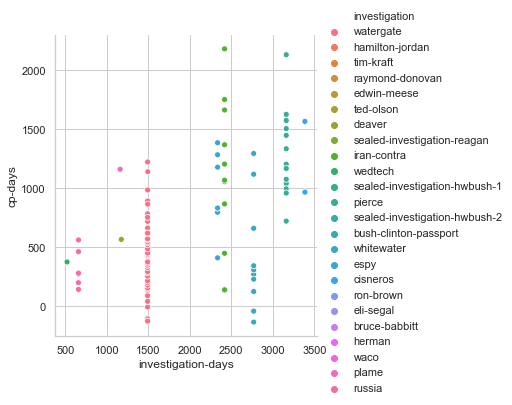

In [24]:
sns.relplot(x="investigation-days",y="cp-days",hue="investigation",data=df, kind="scatter")

There seems to be a positive correlation between the length of the investigation and the length of the conviction proceedings, allowing us to predict that shorter investigations will have shorter conviction proceedings. 

In order to confirm at least correlation, lets look at a linear line of regression. 

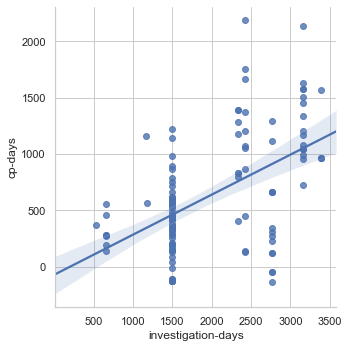

In [61]:
sns.lmplot(x="investigation-days",y="cp-days",data=df) 

From this we can tell that there is a positive correlation between the length of the investigation and the length of conviction proceedings. 

#### Which president has pardoned the most individuals involved in his impeachment investigation? Which has pardoned the least?

If we make a table of the number of boolean trues and falses for those pardoned, we can see which president was responsible for the most pardons.

In [33]:
dfn_pardon = pd.crosstab(df["pardoned"],df["president"])
dfn_pardon

president,Bill Clinton,Donald Trump,George H.W. Bush,George W. Bush,Jimmy Carter,Richard Nixon,Ronald Reagan
pardoned,,,,,,,
False,32,34,19,0,2,67,14
True,13,0,1,1,0,5,6


From this table we can tell that while Richard Nixon was responsible the most people investigated as a result of his impeachment trial, Bill Clinton pardoned the most, having pardoned 13 of the 32 people investigated. He pardoned 40.625% of the individuals associated with his impeachment trial. However, George Bush pardoned 100% of those investigated in his impeachment trial. 

Alternatively, Donald Trump and Jimmy Carter have not pardoned anyone associated with their impeachment trial. Given Donald Trump's presidency has yet to end, this could change. 

#### How many individuals investigated were American? How many were not American?

Lets first look at the total number of americans investigated, this way we can subtract this number from the total number of people investigated to get the number of those investigated who were not American. 

In [144]:
df["american"].sum()

167

167 of the 194 individuals investigated were American, meaning that 27 individuals investigated were not American.

Let's take a closer look at what presidents caused non-americans to be investigated.

In [53]:
dfn_american = pd.crosstab(df["american"],df["president"])
dfn_american

president,Bill Clinton,Donald Trump,George H.W. Bush,George W. Bush,Jimmy Carter,Richard Nixon,Ronald Reagan
american,,,,,,,
False,1,26,0,0,0,0,0
True,44,8,20,1,2,72,20


What we have learned from this is that non-americans being investigated is a fairly new phenomenon, in fact Bill Clinton was the first US Impeachment trial to cause the investigation of a non-american. But, Trump's impeachment investigation has led to 26 non-americans being ivnestigated, this accounts for 96.3% of total non-americans investigated. In fact, Trump's impeachment trial has investigated 3.25x more non-americans than americans. 

#### Do Americans tend to be pardoned more than non-Americans?

Let's look at the number of people pardoned as a function of whether or not they are American. 

In [54]:
dfp_american = pd.crosstab(df["pardoned"],df["american"])
dfp_american

american,False,True
pardoned,,
False,27,141
True,0,26


Looking at the table, we see that no non-american has ever been pardoned by a president as a result of his impeachment investigation. 

#### What percentage of guilty-pleas are pardoned?

Let's now look at the number of people pardoend as a function of what type of investigation they were.

In [56]:
dfp_type = pd.crosstab(df["pardoned"],df["type"])
dfp_type

type,conviction,guilty-plea,indictment
pardoned,,,
False,32,69,54
True,7,17,2


From this table we can find that most cases result in a guilty-plea, but more importantly that 24.6% of people that plead guilty were pardoned, in contrast 21.9% of those convicted were pardoned and only 3.7% of those indicted were pardoned. 

## Conclusion

My dataset explored impeachment investigations throughout the political history of the United States, starting with perhaps the most famous impeachment--the impeachment of Richard Nixon. Ultimately what we have found is that for a while, impeachment investigations may have been considered a thing of the past. The United States experienced many impeachment investigations from the 1970s till 2000, but then after the early 2000s the US did not experience another impeachment investigation till 2019. This is well shown by a graph of investigations over time:

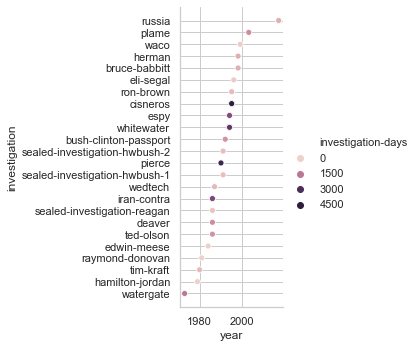

In [57]:
sns.relplot(x="year",y="investigation",hue="investigation-days",data=df,kind="scatter")

Given the relevancy of the most recent impeachment investigation into President Trump in 2019, I find it important to bring up the differences between this investigation and previous investigations. The impeachment investigation of Clinton in the late 1990s was the first American impeachment investigation when a non-american was indicted--and it was only one non-american. In 2019, Trump's impeachment investigation has led to more non-americans being indicted than americans, with 76.4% of total indictments in Trump's investigations being of non-americans. This seems to mean that Trump's alleged crimes were of an international scale or at least were with non-americans. Given the recent nature of all non-american indictments, it is safe to conclude that impeachable offenses on an international scale are fairly new to American politics. 

After looking at what leads people to be indicted and the trends in indictments, it is only reasonable to look at what happens post-indictment. From our data we found that the most common result of an indictment is a guilty-plea with 86 indictments ending in guilty-pleas. It seems that the president being investigated tends to look favorably upon those pleading guilty with 24.6% of those pleading guilty being pardoned, more than any other group. When it comes to pardons, no-one has used them more than Bill Clinton who pardoned 40.6% of those who were convicted as a result of his investigation--equal to 13 people. So far, Trump has yet to pardon anyone indicted as a result of his investigation, but there is still time. 

My analysis showed several trends in the data including a strong positive correlation between the length of investigations and the length of conviction proceedings. While there is an argument for a causation relationship between length of investigations and length of conviction proceedings, where longer investigations generally produce more evidence which extend the length of conviction proceedings; there is also a case for correlation where the investigation and conviction proceedings were simply longer when the case was complicated. 

In the future, I would want to compare this dataset with data on presidency's approval rates to see how much of an impact indictments, investigations, and pardons have on a presidents approval rate. 

## Acknowledgements

Many thanks to Navya Mangipudi and Ms. Sconyers for their much appreciated help. Additional thanks to Ms. Sconyers for providing me with code and data. Additional thanks to Scott for providing me with much needed emotional encouragement. Additional thanks to Geeks2Geeks for help with the ".sum()" function. Additional thanks to StackOverflow for help with the crosstab function and the countplot. Both Geeks2Geeks' and StackOverlow's help were crucial to my analysis. Additional thanks to the students in my big data class for help with the useful visualizations table. 